<a href="https://colab.research.google.com/github/Charles20239/Credit_Card_Default_Prediction/blob/main/LogicRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [553]:
import pandas as pd
import numpy as np

In [554]:
data = pd.read_csv('default_of_credit_card_clients.csv', header=1)

In [555]:
# show data
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [556]:
# show data information
data.shape

(30000, 25)

In [557]:
# show data information
data.describe

<bound method NDFrame.describe of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...

In [558]:
# check missing value
missing_values = data.isnull().sum()
missing_values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [559]:
# adjust "EDUCATION" column
#data["EDUCATION"] = data["EDUCATION"].replace({0:4, 5:4 ,6:4})
# adjust "MARRIAGE" column
#data["MARRIAGE"] = data["MARRIAGE"].replace({0:3})



In [560]:
data["EDUCATION"]

0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 30000, dtype: int64

In [561]:
data["MARRIAGE"]

0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 30000, dtype: int64

In [562]:
# check the unique date to confirm changes
education_unique_values = data["EDUCATION"].unique()
marriage_unique_values = data["MARRIAGE"].unique()

education_unique_values, marriage_unique_values

(array([2, 1, 3, 5, 4, 6, 0]), array([1, 2, 3, 0]))

In [563]:
# chech sex(X2) information
sex_distribution = data["SEX"].value_counts()
sex_distribution

2    18112
1    11888
Name: SEX, dtype: int64

In [564]:
# chech education(X3) information
education_distribution = data["EDUCATION"].value_counts()
education_distribution

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [565]:
# chech marriage(X4) information
marriage_distribution = data["MARRIAGE"].value_counts()
marriage_distribution

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [566]:
# chech target label(Y) information
target_distribution = data["default payment next month"].value_counts()
target_distribution

0    23364
1     6636
Name: default payment next month, dtype: int64

**Data process finished!**

**Start training model!**

In [567]:
from sklearn.model_selection import train_test_split

# split data into features (X) and target (Y)
X = data.drop(["ID","default payment next month"],axis = 1)  # exclude the last column (the target) and the first two rows (header)
Y = data["default payment next month"]  # last column is the target variable

# split data into training and testing sets (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((21000, 23), (9000, 23), (21000,), (9000,))

In [568]:
# check train and tes data type
y_train_data_type = Y_train.dtype
y_test_data_type = Y_test.dtype

y_train_data_type, y_test_data_type

(dtype('int64'), dtype('int64'))

In [569]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# train the model
logistic_model.fit(X_train, Y_train)

# predict on the test set
Y_pred = logistic_model.predict(X_test)


In [570]:
# show performance
class_report = classification_report(Y_test, Y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


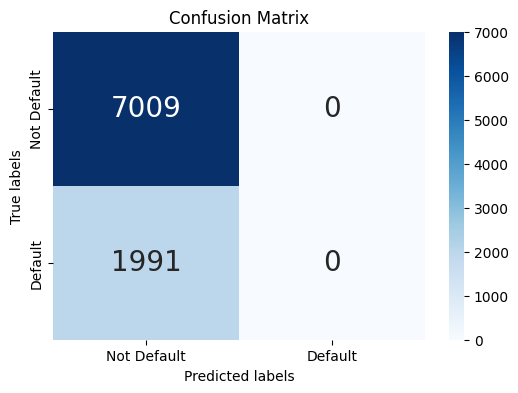

In [571]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,annot_kws={"size": 20}, fmt="d", cmap="Blues", xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


**Start again with balanced data**

In [572]:
from sklearn import metrics
import numpy as np

print("Explained Variance Score: ",
    metrics.explained_variance_score(Y_test, Y_pred))
print('Mean Absolute Error:',
    metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:',
    metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:',
    np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R^2 score:',
    metrics.r2_score(Y_test, Y_pred))

Explained Variance Score:  0.0
Mean Absolute Error: 0.2212222222222222
Mean Squared Error: 0.2212222222222222
Root Mean Squared Error: 0.4703426646841877
R^2 score: -0.2840633471251248


In [573]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)



In [574]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# initialize the logistic regression model
logistic_model_1 = LogisticRegression(max_iter=1000, random_state=42)

# train the model
logistic_model_1.fit(X_resampled, Y_resampled)

# predict on the test set
Y_pred = logistic_model_1.predict(X_test)

In [575]:
# show performance
class_report = classification_report(Y_test, Y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.52      0.65      7009
           1       0.30      0.71      0.42      1991

    accuracy                           0.56      9000
   macro avg       0.58      0.62      0.53      9000
weighted avg       0.74      0.56      0.60      9000



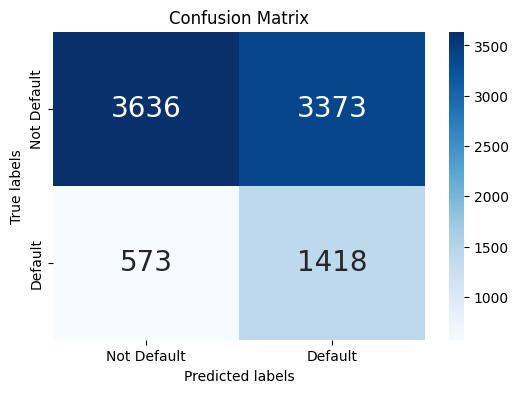

In [576]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,annot_kws={"size": 20}, fmt="d", cmap="Blues", xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()